In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [5]:
df=pd.read_csv('height-weight.csv')

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [7]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

## Visualization

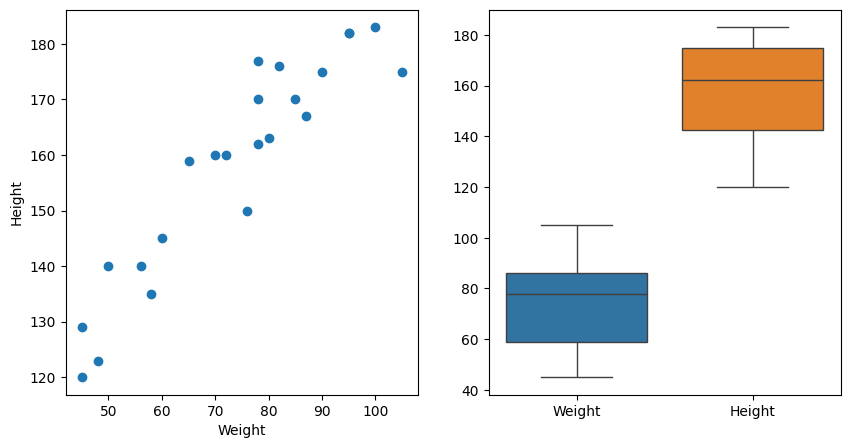

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.subplot(1,2,2)
sns.boxplot(df)
plt.show()


In [9]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X=df[['Weight']]
y=df['Height']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## fit calculates mean and standart dev. for t_train
## transform try to change by applying z_score 
## x test uses x_trains mean and st.dev. for avoid data leak

In [16]:
#Train model
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [18]:
print(lr.coef_) #slope 
print(lr.intercept_) #intercept point

[17.03440872]
157.5


In [19]:
predicted=lr.predict(X_train_scaled)

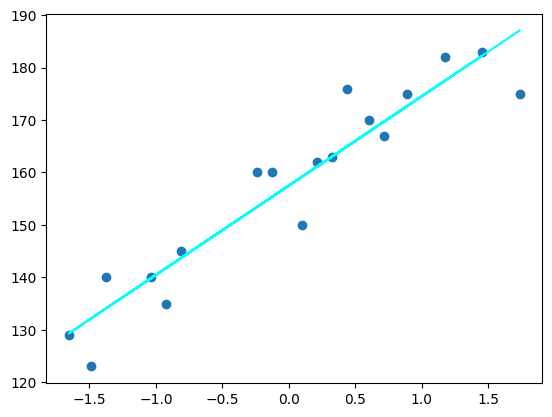

In [20]:
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,predicted,color='cyan')


In [21]:
# prediction of train data
# predicted height output= intercept +coef_(Weights)
# y_pred_train =65.4364 + 1.26(X_train)
# prediction of test data
# predicted height output= intercept +coef_(Weights)
# y_pred_test =65.4364 + 1.26(X_test)

In [22]:
#prediction of test data
y_test_pred=lr.predict(X_test_scaled)

In [23]:
y_test_pred,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

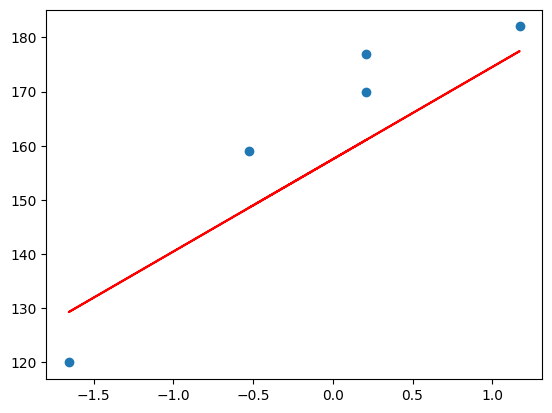

In [24]:
plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled,lr.predict(X_test_scaled),'r')

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
mea=mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_test_pred) # it is a score that shows how well the model is fitted to the data
print(r2,rmse,mea,mse)

0.776986986042344 10.477400726827081 9.822657814519232 109.77592599051664


In [27]:

#rmse=2.5 means that the model is predicting the height of the people with an error of 2.5 cm
#mea=2.5 means that the model is predicting the height of the people with an error of 2.5 cm
#r2=0.77 means that the model is predicting the height of the people with an accuracy of 77%

In [28]:
# i am getting a new data point which is 80 kg and i want to predict the height of this person
# i need to scale this data point
new_data=scaler.transform([[80]])
new_data

c:\Users\snrpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [29]:
lr.predict(new_data)

array([163.01076266])

In [30]:
## assumption of linear regression
#1. Linearity
#2. Residuals should be normally distributed


<Axes: xlabel='Height', ylabel='Count'>

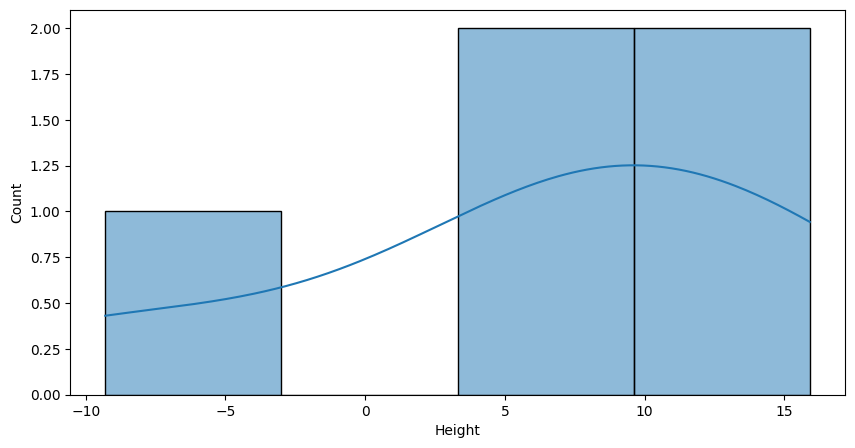

In [35]:
resudiad=y_test-y_test_pred
plt.figure(figsize=(10,5))
sns.histplot(resudiad,kde=True)